In [1]:
!pip install pandas scikit-learn matplotlib


  Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached scikit_learn-1.5.2-cp312-cp312-win_amd64.whl.metadata (13 kB)
  Using cached matplotlib-3.9.2-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached numpy-2.1.1-cp312-cp312-win_amd64.whl.metadata (59 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached scipy-1.14.1-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
  Using cached contourpy-1.3.0-cp312-cp312-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.54.1-cp312-cp312-win_amd64.whl.metadata (167 kB)
  Using cached kiwisolver-1.4.7-cp312-cp312-win_amd64.whl.metadata (6.4 kB


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('agri_data.csv')


print(df.head())


def categorize_water_needed(water_needed):
    if water_needed <= 40:
        return 'Low'
    elif 40 < water_needed <= 80:
        return 'Medium'
    else:
        return 'High'

   Temperature (°C)  Soil Moisture (%)  Water Needed (ml)
0                21                 42                 58
1                32                 78                 22
2                22                 86                 14
3                32                 32                 68
4                18                 64                 36


In [4]:
df['Water Category'] = df['Water Needed (ml)'].apply(categorize_water_needed)


X = df[['Temperature', 'Moisture']]
y = df['Water Category']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


svm_model = SVC(kernel='linear')  
svm_model.fit(X_train, y_train)


SVC(kernel='linear')

In [5]:
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))


Accuracy: 0.95
              precision    recall  f1-score   support

        High       0.67      1.00      0.80         2
         Low       1.00      1.00      1.00        11
      Medium       1.00      0.86      0.92         7

    accuracy                           0.95        20
   macro avg       0.89      0.95      0.91        20
weighted avg       0.97      0.95      0.95        20



C:\Users\binuo\AppData\Local\Temp\ipykernel_1316\4092348324.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Water Category', data=df, palette='Set2')


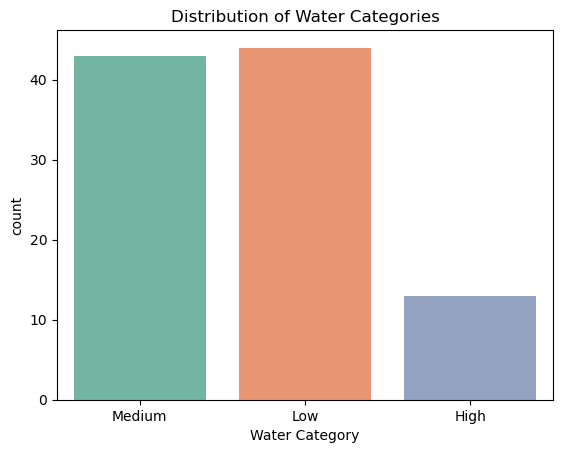

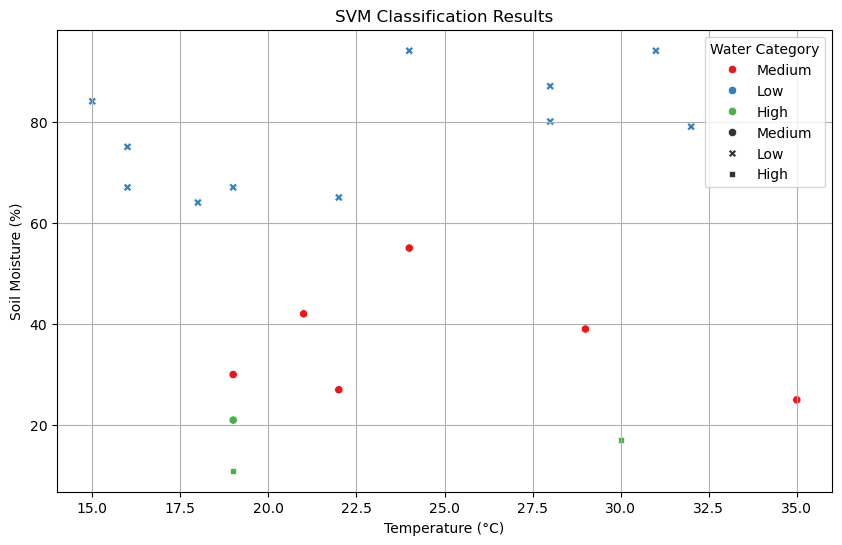

In [6]:
sns.countplot(x='Water Category', data=df, palette='Set2')
plt.title('Distribution of Water Categories')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['Temperature (°C)'], y=X_test['Soil Moisture (%)'], hue=y_pred, style=y_test, palette='Set1')
plt.title('SVM Classification Results')
plt.xlabel('Temperature (°C)')
plt.ylabel('Soil Moisture (%)')
plt.legend(title='Water Category')
plt.grid()
plt.show()